# Chapter 4 Handling Numerical Data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import covariance
from sklearn import datasets
from sklearn import cluster
from sklearn import impute
from sklearn import impute

## 4.1 Rescaling a Feature
Min-max scaling uses the minimum and maximum:
$$x'_i=\frac{x_i-\min(x)}{\max(x)-\min(x)}\cdot(range_{max}-range_{min})+range_{min}$$

In [2]:
# create a feature
feature = np.array([[-500.1], [-100.1], [0], [100.1], [900.9]])
# create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(1, 11))
minmax_scale.fit_transform(feature)

array([[ 1.        ],
       [ 3.8551035 ],
       [ 4.56959315],
       [ 5.2840828 ],
       [11.        ]])

## 4.2 Standardizing a Feature

In [3]:
feature = np.array([[-1000.1], [-200.2], [500.5], [600.6], [9000.9]])
scaler = preprocessing.StandardScaler()
scaler.fit_transform(feature)
print("mean(feature) =", np.mean(feature))
print("std(feature) =", np.std(feature))
print("scaler * std + mean =\n", scaler.fit_transform(feature) * np.std(feature) + np.mean(feature))
# if data has significant outliers
robust_scaler = preprocessing.RobustScaler()
robust_scaler.fit_transform(feature)

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

mean(feature) = 1780.3399999999997
std(feature) = 3655.6709067420165
scaler * std + mean =
 [[-1000.1]
 [ -200.2]
 [  500.5]
 [  600.6]
 [ 9000.9]]


array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

## 4.3 Normalizing Observations
It rescales the values on individual observations to have unit form
$$\mathbf{x}'_i=\frac{\mathbf{x}_i}{\|\mathbf{x}_i\|_n}$$
with $L_n$ norm:
$$\|\mathbf{x}_i\|_n=(\sum_{i=1}^{m}x_i^n)^{\frac{1}{n}}$$

In [4]:
feature = np.array([[0.5, 0.5], [1.1, 3.4], [1.5, 20.2], [1.63, 34.4], [10.9, 3.3]])
normalizer = preprocessing.Normalizer(norm="l2")
normalizer.transform(feature)
normalizer = preprocessing.Normalizer(norm="l1")
normalizer.transform(feature)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

## 4.4 Generating Polynomial and Interaction Features
`degree=2` will create $x_1, \dots, x_n, x_1^2, x_1x_2, \dots, x_1x_n, x_2^2, x_2x_3, \dots, x_2x_n, \dots, x_n^2$

`degree=3` will create more


In [5]:
feature = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]])
polynomial_interaction = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
polynomial_interaction.fit_transform(feature)
# presever only interaction term
polynomial_interaction = preprocessing.PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
polynomial_interaction.fit_transform(feature)
# add x^0 = 1
polynomial_interaction = preprocessing.PolynomialFeatures(degree=3, include_bias=True)
polynomial_interaction.fit_transform(feature)

array([[  1.,   2.,   3.,   1.,   2.,   3.,   4.,   6.,   9.,   1.,   2.,
          3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  2.,   3.,   4.,   4.,   6.,   8.,   9.,  12.,  16.,   8.,  12.,
         16.,  18.,  24.,  32.,  27.,  36.,  48.,  64.],
       [  3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,  36.,
         45.,  48.,  60.,  75.,  64.,  80., 100., 125.]])

array([[ 1.,  2.,  3.,  2.,  3.,  6.,  6.],
       [ 2.,  3.,  4.,  6.,  8., 12., 24.],
       [ 3.,  4.,  5., 12., 15., 20., 60.]])

array([[  1.,   1.,   2.,   3.,   1.,   2.,   3.,   4.,   6.,   9.,   1.,
          2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   2.,   3.,   4.,   4.,   6.,   8.,   9.,  12.,  16.,   8.,
         12.,  16.,  18.,  24.,  32.,  27.,  36.,  48.,  64.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,
         36.,  45.,  48.,  60.,  75.,  64.,  80., 100., 125.]])

## 4.5 Transforming Features

In [6]:
add_10 = lambda x: np.log(x)
ten_transformer = preprocessing.FunctionTransformer(add_10)
ten_transformer.transform(feature)

array([[0.        , 0.69314718, 1.09861229],
       [0.69314718, 1.09861229, 1.38629436],
       [1.09861229, 1.38629436, 1.60943791]])

## 4.6 Detecting Outliers

In [7]:
feature, _ = datasets.make_blobs(n_samples=10,
                                 n_features=2,
                                 centers=1,
                                 random_state=1)
# replace with extreme values
feature[0, 0] = 10000
feature[0, 1] = 10000
# detector
# contamination is the proportion of observations that are outliers
# we don't know and we need guess
outlier_detector = covariance.EllipticEnvelope(contamination=0.1)
outlier_detector.fit(feature)
outlier_detector.predict(feature)

# using interquartile range(IQR)
feature = feature[:, 0]
# functions that returns outliers
def indicies_of_outliers(x):
    # the 25% data and the 75% data
    q1, q3 = np.percentile(x, [25, 75])
    # gaps between them
    iqr = q3 - q1
    print("iqr = {}".format(iqr))
    # set bound
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x < lower_bound) | (x > upper_bound))
indicies_of_outliers(feature)

EllipticEnvelope()

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

iqr = 1.6112827796988223


(array([0], dtype=int64),)

## 4.7 Handling Outliers

In [8]:
houses = pd.DataFrame()
houses["Price"] = [543434, 395662, 328646, 4852154]
houses["Bathrooms"] = [2, 3, 2, 116]
houses["Square_feet"] = [1500, 2500, 1500, 48000]
# filter
houses[houses["Bathrooms"] < 20]
# mark outlier
houses["Outlier"] = np.where(houses["Bathrooms"] < 20, 0, 1)
houses
# or digitalize it
houses["Log(Square_feet)"] = houses["Square_feet"].apply(lambda x: np.log(x))
houses
# robust scaling
houses["Robust"] = (robust_scaler.fit_transform(houses["Square_feet"].values.reshape(-1, 1))).reshape(-1)
houses

,Price,Bathrooms,Square_feet
0,543434,2,1500
1,395662,3,2500
2,328646,2,1500


,Price,Bathrooms,Square_feet,Outlier
0,543434,2,1500,0
1,395662,3,2500,0
2,328646,2,1500,0
3,4852154,116,48000,1


,Price,Bathrooms,Square_feet,Outlier,Log(Square_feet)
0,543434,2,1500,0,7.313220
1,395662,3,2500,0,7.824046
2,328646,2,1500,0,7.313220
3,4852154,116,48000,1,10.778956


,Price,Bathrooms,Square_feet,Outlier,Log(Square_feet),Robust
0,543434,2,1500,0,7.313220,-0.040404
1,395662,3,2500,0,7.824046,0.040404
2,328646,2,1500,0,7.313220,-0.040404
3,4852154,116,48000,1,10.778956,3.717172


## 4.8 Discretizating Features

In [9]:
age = np.array([[6], [12], [20], [36], [65]])
# binary 
binarizer = preprocessing.Binarizer(threshold=18)
binarizer.fit_transform(age)
# multiple
# with [)
np.digitize(age, bins=[20, 30, 64])
# with (]
np.digitize(age, bins=[20, 30, 64], right=True)

array([[0],
       [0],
       [1],
       [1],
       [1]])

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

array([[0],
       [0],
       [0],
       [2],
       [3]], dtype=int64)

## 4.9 Grouping Obervation Using Clustering
Using k-means clustering to group similar observation.

KMeans(n_clusters=3, random_state=0)

,feature_1,feature_2,group
0,-9.877554,-3.336145,0
1,-7.287210,-8.353986,2
2,-6.943061,-7.023744,2
3,-7.440167,-8.791959,2
4,-6.641388,-8.075888,2


<Figure size 432x288 with 0 Axes>

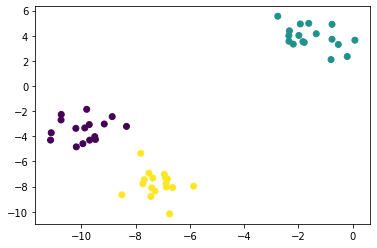

In [10]:
feature, _ = datasets.make_blobs(n_samples=50,
                                 n_features=2,
                                 centers=3,
                                 random_state=1)
df = pd.DataFrame(feature, columns=["feature_1", "feature_2"])
clustering = cluster.KMeans(3, random_state=0)
clustering.fit(feature)
df["group"] = clustering.predict(feature)
df.head(5)
plt.figure()
plt.scatter(df["feature_1"], df["feature_2"], c=df["group"])
plt.show()

## 4.10 Deleting Observations with Missing Value

In [11]:
feature = np.array([[1.1, 11.1], [2.2, 22.2], [3.3, 33.3], [4.4, 44.4], [np.nan, 55.5]])
feature[~np.isnan(feature).any(axis=1)]
df = pd.DataFrame(feature, columns=["a", "b"])
df.dropna()

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

,a,b
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


## 4.11 Inputing Missing Values

In [12]:
feature, _ = datasets.make_blobs(n_samples=1000,
                                 n_features=2,
                                 random_state=1)
scaler = preprocessing.StandardScaler()
standardized_feature = scaler.fit_transform(feature)
# testing...
true_value = standardized_feature[0, 0]
standardized_feature[0, 0] = np.nan
# predicting...
feature_knn_imputed = impute.KNNImputer(n_neighbors=5).fit_transform(standardized_feature)
# comparing...
print("True value:", true_value)
print("Imputed Value:", feature_knn_imputed[0, 0])

# another way
mean_imputed = impute.SimpleImputer()
feature_mean_imputed = mean_imputed.fit_transform(feature)
# comparing...
print("True value:", true_value)
print("Imputed Value:", feature_mean_imputed[0, 0])

True value: 0.8730186113995938
Imputed Value: 1.0959262913919632
True value: 0.8730186113995938
Imputed Value: -3.058372724614996
